In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

<h1> Load Dataset </h1>

In [2]:
## CSV from: https://www.kaggle.com/code/salikhussaini49/read-data-from-directory
df = pd.read_csv('data/dataset.csv')
df.drop(['Unnamed: 0', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium', 'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC', 'Fibrinogen', 'Platelets'], axis=1, inplace=True)

In [3]:
df.head()

Hour    HR  O2Sat  Temp    SBP   MAP   DBP  Resp  Glucose    Age  Gender  \
0     0   NaN    NaN   NaN    NaN   NaN   NaN   NaN      NaN  68.54       0   
1     1  65.0  100.0   NaN    NaN  72.0   NaN  16.5      NaN  68.54       0   
2     2  78.0  100.0   NaN    NaN  42.5   NaN   NaN      NaN  68.54       0   
3     3  73.0  100.0   NaN    NaN   NaN   NaN  17.0      NaN  68.54       0   
4     4  70.0  100.0   NaN  129.0  74.0  69.0  14.0    161.0  68.54       0   

   Unit1  Unit2  HospAdmTime  ICULOS  SepsisLabel  Patient_ID  
0    NaN    NaN        -0.02       1            0       17072  
1    NaN    NaN        -0.02       2            0       17072  
2    NaN    NaN        -0.02       3            0       17072  
3    NaN    NaN        -0.02       4            0       17072  
4    NaN    NaN        -0.02       5            0       17072

In [4]:
df.describe()

Hour            HR         O2Sat           Temp           SBP  \
count  1.552210e+06  1.398811e+06  1.349474e+06  525226.000000  1.325945e+06   
mean   2.549274e+01  8.458144e+01  9.719395e+01      36.977228  1.237505e+02   
std    2.888256e+01  1.732524e+01  2.936924e+00       0.770014  2.323156e+01   
min    0.000000e+00  2.000000e+01  2.000000e+01      20.900000  2.000000e+01   
25%    9.000000e+00  7.200000e+01  9.600000e+01      36.500000  1.070000e+02   
50%    1.900000e+01  8.350000e+01  9.800000e+01      37.000000  1.210000e+02   
75%    3.300000e+01  9.550000e+01  9.950000e+01      37.500000  1.380000e+02   
max    3.350000e+02  2.800000e+02  1.000000e+02      50.000000  3.000000e+02   

                MAP           DBP          Resp        Glucose           Age  \
count  1.358940e+06  1.065656e+06  1.313875e+06  265516.000000  1.552210e+06   
mean   8.240010e+01  6.383056e+01  1.872650e+01     136.932283  6.200947e+01   
std    1.634175e+01  1.395601e+01  5.098194e+00      51.310728  1.638622e+01   
min    2.000000e+01  2.000000e+01  1.000000e+00      10.000000  1.400000e+01   
25%    7.100000e+01  5.400000e+01  1.500000e+01     106.000000  5.168000e+01   
50%    8.000000e+01  6.200000e+01  1.800000e+01     127.000000  6.400000e+01   
75%    9.200000e+01  7.200000e+01  2.150000e+01     153.000000  7.400000e+01   
max    3.000000e+02  3.000000e+02  1.000000e+02     988.000000  1.000000e+02   

             Gender          Unit1          Unit2   HospAdmTime        ICULOS  \
count  1.552210e+06  940250.000000  940250.000000  1.552202e+06  1.552210e+06   
mean   5.592690e-01       0.496571       0.503429 -5.612512e+01  2.699499e+01   
std    4.964749e-01       0.499989       0.499989  1.622569e+02  2.900542e+01   
min    0.000000e+00       0.000000       0.000000 -5.366860e+03  1.000000e+00   
25%    0.000000e+00       0.000000       0.000000 -4.705000e+01  1.100000e+01   
50%    1.000000e+00       0.000000       1.000000 -6.030000e+00  2.100000e+01   
75%    1.000000e+00       1.000000       1.000000 -4.000000e-02  3.400000e+01   
max    1.000000e+00       1.000000       1.000000  2.399000e+01  3.360000e+02   

        SepsisLabel    Patient_ID  
count  1.552210e+06  1.552210e+06  
mean   1.798468e-02  5.920148e+04  
std    1.328956e-01  5.024819e+04  
min    0.000000e+00  1.000000e+00  
25%    0.000000e+00  9.990000e+03  
50%    0.000000e+00  1.996500e+04  
75%    0.000000e+00  1.098780e+05  
max    1.000000e+00  1.200000e+05

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 17 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Hour         1552210 non-null  int64  
 1   HR           1398811 non-null  float64
 2   O2Sat        1349474 non-null  float64
 3   Temp         525226 non-null   float64
 4   SBP          1325945 non-null  float64
 5   MAP          1358940 non-null  float64
 6   DBP          1065656 non-null  float64
 7   Resp         1313875 non-null  float64
 8   Glucose      265516 non-null   float64
 9   Age          1552210 non-null  float64
 10  Gender       1552210 non-null  int64  
 11  Unit1        940250 non-null   float64
 12  Unit2        940250 non-null   float64
 13  HospAdmTime  1552202 non-null  float64
 14  ICULOS       1552210 non-null  int64  
 15  SepsisLabel  1552210 non-null  int64  
 16  Patient_ID   1552210 non-null  int64  
dtypes: float64(12), int64(5)
memory usage: 201.3 M

<h1> Pre-processing </h1>

<h3> Replace missing values </h3>

In [6]:
"""Méthode qui permet de fill les NaN avec une méthode qui s'appel le ForwardFill
et qui fait aussi du Backward fill"""

def impute_missing_vals(df, attributes):
    df_clean = df.copy()
    for att in attributes:
        if df_clean[att].isnull().sum() == len(df_clean):
            df_clean[att] = df_clean[att].fillna(0) # On remplie les cases par des 0
        elif df_clean[att].isnull().sum() == len(df_clean) - 1:
            df_clean[att] = df_clean[att].ffill().bfill() # On remplie les cases à l'aide d'un Forward Fill et d'un Backward Fill
        else:
            df_clean[att] = df_clean[att].interpolate(method='nearest', limit_direction='both') # On utilise une méthode d'interpolation pour remplir avec des valeurs non nulles.
            df_clean[att] = df_clean[att].ffill().bfill()
    
    return df_clean

In [7]:
df = impute_missing_vals(df, df.columns)

<h3> Standardization </h3>

In [8]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(df.loc[:, df.columns != 'Patient_ID'].to_numpy())
df.loc[:, df.columns != 'Patient_ID'] = scaled_data

In [9]:
df.head()

Hour        HR  O2Sat     Temp       SBP       MAP    DBP      Resp  \
0  0.000000  0.173077    1.0  0.51134  0.389286  0.185714  0.175  0.156566   
1  0.002985  0.173077    1.0  0.51134  0.389286  0.185714  0.175  0.156566   
2  0.005970  0.223077    1.0  0.51134  0.389286  0.080357  0.175  0.156566   
3  0.008955  0.203846    1.0  0.51134  0.389286  0.080357  0.175  0.161616   
4  0.011940  0.192308    1.0  0.51134  0.389286  0.192857  0.175  0.131313   

    Glucose       Age  Gender  Unit1  Unit2  HospAdmTime    ICULOS  \
0  0.154397  0.634186     0.0    1.0    0.0     0.995546  0.000000   
1  0.154397  0.634186     0.0    1.0    0.0     0.995546  0.002985   
2  0.154397  0.634186     0.0    1.0    0.0     0.995546  0.005970   
3  0.154397  0.634186     0.0    1.0    0.0     0.995546  0.008955   
4  0.154397  0.634186     0.0    1.0    0.0     0.995546  0.011940   

   SepsisLabel  Patient_ID  
0          0.0       17072  
1          0.0       17072  
2          0.0       17072  
3          0.0       17072  
4          0.0       17072

In [10]:
df.describe()

Hour            HR         O2Sat          Temp           SBP  \
count  1.552210e+06  1.552210e+06  1.552210e+06  1.552210e+06  1.552210e+06   
mean   7.609774e-02  2.476600e-01  9.644136e-01  5.485283e-01  3.705302e-01   
std    8.621659e-02  6.673580e-02  3.863969e-02  2.491878e-02  8.290813e-02   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.686567e-02  2.000000e-01  9.500000e-01  5.326460e-01  3.107143e-01   
50%    5.671642e-02  2.423077e-01  9.750000e-01  5.474227e-01  3.607143e-01   
75%    9.850746e-02  2.884615e-01  9.875000e-01  5.635739e-01  4.214286e-01   
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

                MAP           DBP          Resp       Glucose           Age  \
count  1.552210e+06  1.552210e+06  1.552210e+06  1.552210e+06  1.552210e+06   
mean   2.239183e-01  1.558019e-01  1.785700e-01  1.252508e-01  5.582496e-01   
std    5.851399e-02  5.019481e-02  5.185881e-02  5.000579e-02  1.905374e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.821429e-01  1.214286e-01  1.464646e-01  9.509202e-02  4.381395e-01   
50%    2.178571e-01  1.500000e-01  1.717172e-01  1.145194e-01  5.813953e-01   
75%    2.571429e-01  1.857143e-01  2.020202e-01  1.411043e-01  6.976744e-01   
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

             Gender         Unit1         Unit2   HospAdmTime        ICULOS  \
count  1.552210e+06  1.552210e+06  1.552210e+06  1.552210e+06  1.552210e+06   
mean   5.592690e-01  4.995200e-01  5.004800e-01  9.851386e-01  7.759699e-02   
std    4.964749e-01  4.999999e-01  4.999999e-01  3.009855e-02  8.658334e-02   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  9.868221e-01  2.985075e-02   
50%    1.000000e+00  0.000000e+00  1.000000e+00  9.944313e-01  5.970149e-02   
75%    1.000000e+00  1.000000e+00  1.000000e+00  9.955424e-01  9.850746e-02   
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

        SepsisLabel    Patient_ID  
count  1.552210e+06  1.552210e+06  
mean   1.798468e-02  5.920148e+04  
std    1.328956e-01  5.024819e+04  
min    0.000000e+00  1.000000e+00  
25%    0.000000e+00  9.990000e+03  
50%    0.000000e+00  1.996500e+04  
75%    0.000000e+00  1.098780e+05  
max    1.000000e+00  1.200000e+05

<h3> Split dataset per patient </h3>

In [11]:
data = []
label = []
window_size = 6

for patientId in df['Patient_ID'].unique():
    tmp_data = df[df['Patient_ID'] == patientId]
    if(len(tmp_data) >= window_size):
        data.append(tmp_data.drop(['Hour', 'Patient_ID', 'SepsisLabel'], axis=1).to_numpy())
        label.append(tmp_data['SepsisLabel'].to_numpy())

In [31]:
data

[array([[0.17307692, 1.        , 0.51134021, 0.38928571, 0.18571429,
         0.175     , 0.15656566, 0.15439673, 0.63418605, 0.        ,
         1.        , 0.        , 0.99554616, 0.        ],
        [0.17307692, 1.        , 0.51134021, 0.38928571, 0.18571429,
         0.175     , 0.15656566, 0.15439673, 0.63418605, 0.        ,
         1.        , 0.        , 0.99554616, 0.00298507],
        [0.22307692, 1.        , 0.51134021, 0.38928571, 0.08035714,
         0.175     , 0.15656566, 0.15439673, 0.63418605, 0.        ,
         1.        , 0.        , 0.99554616, 0.00597015],
        [0.20384615, 1.        , 0.51134021, 0.38928571, 0.08035714,
         0.175     , 0.16161616, 0.15439673, 0.63418605, 0.        ,
         1.        , 0.        , 0.99554616, 0.00895522],
        [0.19230769, 1.        , 0.51134021, 0.38928571, 0.19285714,
         0.175     , 0.13131313, 0.15439673, 0.63418605, 0.        ,
         1.        , 0.        , 0.99554616, 0.0119403 ],
        [0.16153846,

In [58]:
# One patient per batch
train_loader = []

for i in range(len(data)):
    patient_data = data[i]
    labels = label[i]
    X_data = []
    Y_data = []
    
    for j in range(len(patient_data) - (window_size - 1)):
        X_data.append(patient_data[j:(j + window_size)])
        Y_data.append([labels[(j + window_size - 1)]])
    
    train_loader.append([torch.Tensor(X_data), torch.Tensor(Y_data)])

<h1> TimeSeriesDataset </h1>

In [59]:
# OLD METHOD (BATCH WITH MULTIPLE PATIENT)
'''
from torch.utils.data import TensorDataset, DataLoader

tensor_x = torch.Tensor(X_data) # transform to torch tensor
tensor_y = torch.Tensor(Y_data)

train_dataset = TensorDataset(tensor_x, tensor_y) # create your datset
train_loader = DataLoader(train_dataset) # create your dataloader, on can add the batch size here
'''

'\nfrom torch.utils.data import TensorDataset, DataLoader\n\ntensor_x = torch.Tensor(X_data) # transform to torch tensor\ntensor_y = torch.Tensor(Y_data)\n\ntrain_dataset = TensorDataset(tensor_x, tensor_y) # create your datset\ntrain_loader = DataLoader(train_dataset) # create your dataloader, on can add the batch size here\n'

<h1> Transfomer </h1>

In [60]:
# SOURCE: https://github.com/LiamMaclean216/Pytorch-Transfomer/blob/master/Transformer.ipynb
from utils import *
from Network import *

#hyperparams
enc_seq_len = 6 # 6 # length of input given to encoder. Can have any integer value.
dec_seq_len = 6 # 2 # length of input given to decoder. Can have any integer value.
output_sequence_length = 1 # 1 # Length of the target sequence, i.e. how many time steps should your forecast cover

input_size = 14 # Multivariate forecasting.
dim_val = 10 # This can be any value divisible by n_heads. 512 is used in the original transformer paper.
dim_attn = 5

lr = 0.002
epochs = 20 # 20

n_heads = 4 # The number of attention heads (aka parallel attention layers). dim_val must be divisible by this number

n_decoder_layers = 1
n_encoder_layers = 3

#batch_size = 256

#init network and optimizer
t = Transformer(dim_val, dim_attn, input_size, dec_seq_len, output_sequence_length, n_decoder_layers, n_encoder_layers, n_heads)
optimizer = torch.optim.Adam(t.parameters(), lr=lr)

<IPython.core.display.Javascript object>


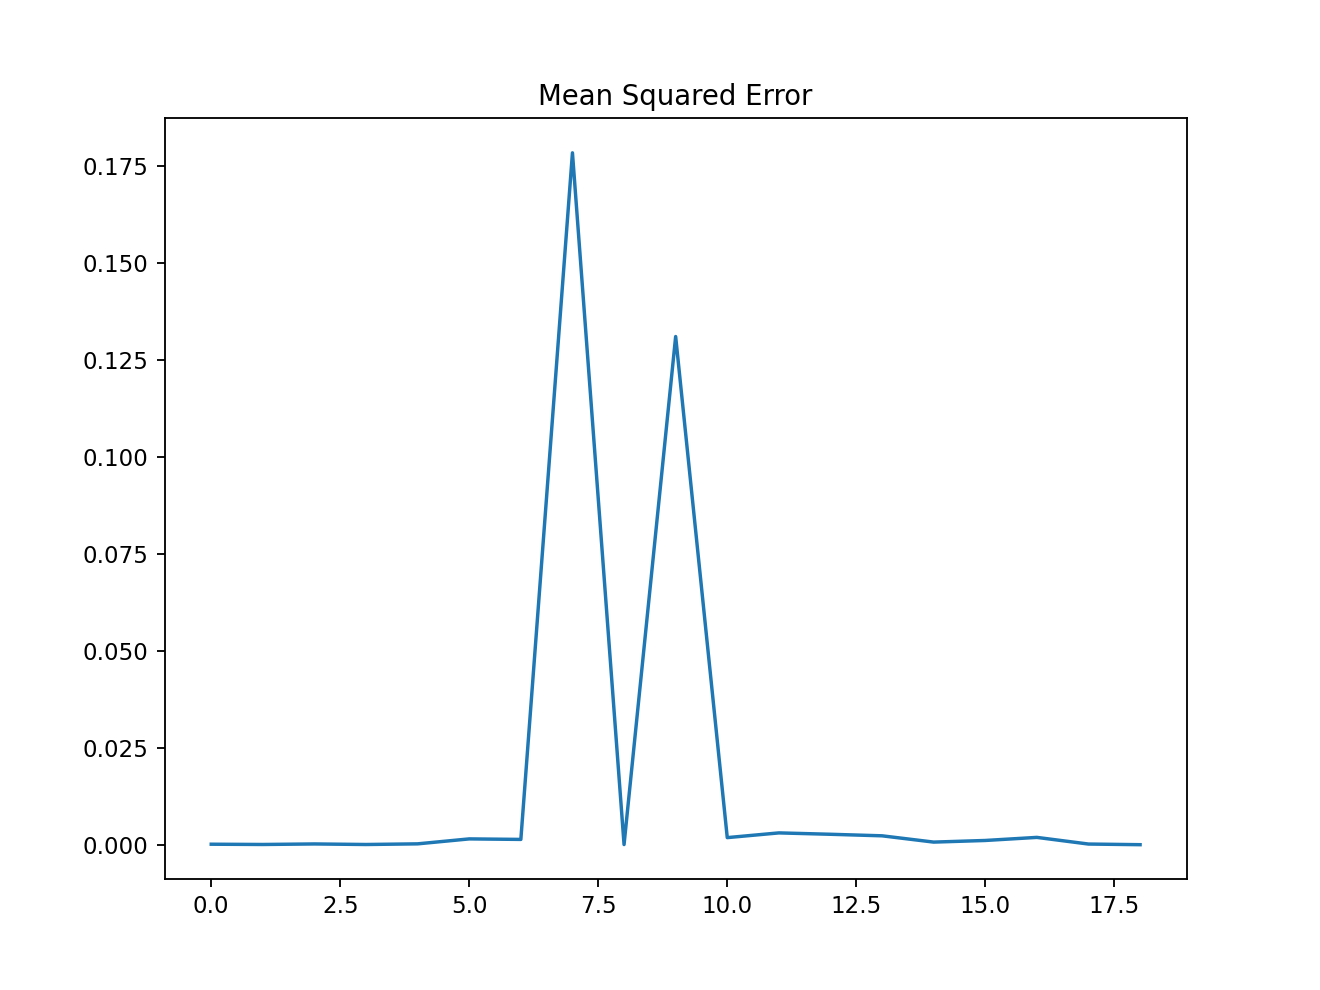

Starting epoch: 0
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],


tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])


KeyboardInterrupt: 

In [62]:
#keep track of loss for graph
losses = []

#build live matplotlib fig
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

    
for e in range(epochs):
    print("Starting epoch: " + str(e))
    out = []
    
    #for b in range(-10- enc_seq_len, 10 - enc_seq_len):
    for b in train_loader:
        optimizer.zero_grad()
        X, Y = b
        
        #Forward pass and calculate loss
        net_out = t(X)
        #print(net_out.shape,Y.shape)
        
        print(Y)
        
        loss = torch.mean((net_out - Y) ** 2)

        #backwards pass
        loss.backward()
        optimizer.step()
        
        #Track losses and draw rgaph
        out.append([net_out.detach().numpy(), Y])
        losses.append(loss.detach().numpy())

        ax.clear()
        ax.plot(losses)
        ax.set_title("Mean Squared Error")
        fig.canvas.draw()